# Applying Autoencoders to Gene Expression data from TCGA (MLB Lab)

In [1]:
repo_path = r"Y:\qiu-lab\Bridget\data\exp\exp_allpts_allgenes.pkl"
import pickle
f = open(repo_path, 'rb') # open mode must be 'rb' for reading or 'wb' for writing pickle files!
data = pickle.load(f)
f.close()

In [2]:
data.head()

site,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-OR-A5JG-01A-11R-A29S-07,0.000000,9.719740,12.015088,0.0,11.983054,12.657380,0.000000,5.291540,15.164170,7.336301,...,0.0,0.000000,0.0,8.810733,8.622226,13.671000,8.092552,0.0,7.582114,0.000000
TCGA-OR-A5LG-01A-11R-A29S-07,0.000000,7.954506,13.157183,0.0,11.205067,12.162185,0.000000,0.000000,15.071660,6.516067,...,0.0,5.115679,0.0,9.375899,0.000000,13.102174,8.059956,0.0,9.040772,0.000000
TCGA-PK-A5H9-01A-11R-A29S-07,0.000000,8.711008,11.614669,0.0,11.088125,13.594347,0.000000,5.537840,14.014239,10.355674,...,0.0,4.800096,0.0,8.141988,0.000000,13.169551,8.052287,0.0,8.830604,0.000000
TCGA-OR-A5J5-01A-11R-A29S-07,7.748258,9.423506,13.053768,0.0,11.065540,12.774002,0.000000,5.619878,14.264850,6.973192,...,0.0,0.000000,0.0,10.238985,8.258911,13.535513,8.316883,0.0,9.684488,0.000000
TCGA-OR-A5LN-01A-11R-A29S-07,0.000000,6.645924,12.709901,0.0,10.992328,13.520740,8.444644,0.000000,14.689312,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,12.693491,8.665420,0.0,9.844140,6.893664


### 1. Z-Score Based Outlier Removal

In [3]:
from scipy import stats
import numpy as np
data_transposed = data.T[(np.abs(stats.zscore(data.T)) < 3).all(axis=1)] #Absolute z-score < 3
non_outlier_data = data_transposed.T
non_outlier_data.shape

(11093, 60341)

### 2.i Missing Values Ratio: Remove columns (features) with greater than 20% nan samples

In [4]:
# non_outlier_data.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command

feature_nan_threshold = int((non_outlier_data.shape[0]/5)) #20% of the samples are nan

#All columns with nan values in more than 20% of samples are removed
non_outlier_data.dropna(thresh=len(non_outlier_data) - feature_nan_threshold, axis=1, inplace=True) 
non_outlier_data.shape

(11093, 60341)

### 2.ii Missing Values Ratio: Remove rows (samples) with greater than 20% nan features

In [6]:
sample_nan_threshold = int((non_outlier_data.shape[1]/5)) #20% of the features are nan

#All rows with nan values in more than 20% of features are removed
non_outlier_data.dropna(thresh=len(non_outlier_data) - sample_nan_threshold, axis=0, inplace=True) 
non_outlier_data.shape

(11093, 60341)

### 2.iii. Missing Values Ratio: Removing all rows and columns with complete nan elements

In [4]:
non_outlier_data.dropna(how='all',axis=1,inplace=True) #Removing columns with all nan rows
non_outlier_data.dropna(how='all',axis=0,inplace=True) #Removing rows with all nan columns
non_outlier_data.shape

(11093, 60341)

In [5]:
non_outlier_data.isnull().sum().sum()

0

### 3. Normalizing the Data and filling in nan values -  before identifying most variable genes

Why Minmax over Standard -> Normalize the data and preserve orginal distribution (Scale it down)

In [9]:
from sklearn.preprocessing import MinMaxScaler
feature_list = non_outlier_data.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
non_outlier_data[feature_list] = scaler.fit_transform(non_outlier_data[feature_list])

#Filling remaining nan with average after scaling
non_outlier_data.fillna(non_outlier_data.mean(), inplace=True)

### 4. 5000 Most Variable Genes using Mean Absolute Deviation

In [10]:
most_variable_genes = non_outlier_data.mad(axis = 0).nlargest(5000, keep='all').index.values.tolist()
#Subseting the genes from mvg_v3_df that are on the most_variable_genes list
mvg_df = non_outlier_data[most_variable_genes]
mvg_df.shape

(11093, 5000)

### START FROM HERE IF MVG ALREADY CREATED

In [1]:
import pandas as pd
# mvg_df.to_csv("5000_mvg_ge.csv.gz", compression="gzip")
mvg_df = pd.read_csv("5000_mvg_ge.csv.gz", index_col=0, compression="gzip") 
mvg_df.shape

(11093, 5000)

In [3]:
import joblib
joblib.dump(mvg_df, "ge_5000_mvf.pkl")

['ge_5000_mvf.pkl']

In [13]:
mvg_df.head()

site,ENSG00000264190.1,ENSG00000266631.1,ENSG00000200815.1,ENSG00000263933.1,ENSG00000273662.1,ENSG00000277792.1,ENSG00000281114.1,ENSG00000275076.1,ENSG00000211575.2,ENSG00000207614.1,...,ENSG00000259414.1,ENSG00000259404.4,ENSG00000227154.3,ENSG00000239856.3,ENSG00000255850.1,ENSG00000259195.1,ENSG00000211725.3,ENSG00000207708.1,ENSG00000258509.1,ENSG00000229992.1
TCGA-OR-A5JG-01A-11R-A29S-07,0.000000,0.732995,0.742187,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.715372,...,0.0,0.0,0.552397,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
TCGA-OR-A5LG-01A-11R-A29S-07,0.931221,0.779879,0.000000,0.727559,0.000000,0.000000,0.000000,0.709325,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.542593,0.0,0.0,0.000000,0.587415
TCGA-PK-A5H9-01A-11R-A29S-07,0.000000,0.753516,0.000000,0.000000,0.804296,0.703542,0.000000,0.000000,0.0,0.791711,...,0.0,0.0,0.000000,0.666886,0.647043,0.521054,0.0,0.0,0.000000,0.508181
TCGA-OR-A5J5-01A-11R-A29S-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.837554,0.000000,0.0,0.798395,...,0.0,0.0,0.578155,0.000000,0.000000,0.573612,0.0,0.0,0.684473,0.000000
TCGA-OR-A5LN-01A-11R-A29S-07,0.000000,0.799033,0.000000,0.000000,0.000000,0.000000,0.000000,0.837588,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.724920,0.000000


### 5. Building a Vanilla Autoencoder

In [14]:
import os
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from keras import backend as K #For explicitly \adjusting the learning rate


In [15]:
X_train, X_val = train_test_split(mvg_df, test_size=0.2, random_state = seed(77))

In [16]:
ncol = mvg_df.shape[1] #Input Feature Number
encoding_dim = 100 #Nodes in Bottleneck layer

#Network configuration
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(500, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(500, activation = 'relu')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1) #Applying sigmoid activation on the output layer ensure input also belongs to (0,1)

In [17]:
# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')#Should try Pseudo-Heuber Loss, Binary Crossentropy 
#adam - stochastic gradient descent algorithm
K.set_value(autoencoder.optimizer.learning_rate, 0.0001) #Setting the learning rate to 10^-3

In [18]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 500)               2500500   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                                 
 dense_3 (Dense)             (None, 5000)              2505000   
                                                                 
Total params: 5,106,100
Trainable params: 5,106,100
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = autoencoder.fit(X_train, X_train, epochs = 200, batch_size = 256, shuffle = False, verbose = 1, validation_data = (X_val, X_val))

Epoch 1/200
35/35 [==============================] - 1s 25ms/step - loss: 0.1268 - val_loss: 0.1088
Epoch 2/200
35/35 [==============================] - 0s 12ms/step - loss: 0.1016 - val_loss: 0.0963
Epoch 3/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0944 - val_loss: 0.0917
Epoch 4/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0896 - val_loss: 0.0872
Epoch 5/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0861 - val_loss: 0.0848
Epoch 6/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0841 - val_loss: 0.0831
Epoch 7/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0823 - val_loss: 0.0813
Epoch 8/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0805 - val_loss: 0.0797
Epoch 9/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0790 - val_loss: 0.0785
Epoch 10/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0779 - val_loss: 0.0776

35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 163/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 164/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 165/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 166/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 167/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 168/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 169/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 170/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0.0691
Epoch 171/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0667 - val_loss: 0

dict_keys(['loss', 'val_loss'])


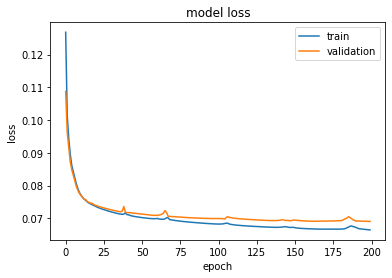

In [20]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
# # Plot history: Accuracy
# plt.plot(history.history['val_accuracy'])
# plt.title('Validation accuracy history')
# plt.ylabel('Accuracy value (%)')
# plt.xlabel('No. epoch')
# plt.show()

In [22]:
#Obtain the reduced data
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(mvg_df), index=mvg_df.index) #Maintain Index for Mapping to cancer type 
encoded_train = encoded_train.add_prefix('feature_')
encoded_train.shape

(11093, 100)

In [23]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command

encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns

encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE

encoded_train.to_csv("GE_AE_Vanilla.csv", index=True)
encoded_train = pd.read_csv("GE_AE_Vanilla.csv",index_col=0)


In [24]:
shape_before_removing_nan, encoded_train.shape

((11093, 100), (11093, 92))

In [25]:
encoded_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_89,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-OR-A5JG-01A-11R-A29S-07,2.293314,8.278182,7.269610,3.069665,0.000000,0.0,8.763028,11.290786,2.517515,12.318659,...,4.894069,0.0,7.653226,4.251017,9.311607,0.069718,0.0,4.301643,2.636208,7.266658
TCGA-OR-A5LG-01A-11R-A29S-07,1.009057,6.978600,6.197421,3.484663,0.000000,0.0,4.847856,8.214343,2.713120,12.591989,...,2.700858,0.0,10.714601,5.259385,3.818106,0.160022,0.0,4.531383,1.871497,4.663869
TCGA-PK-A5H9-01A-11R-A29S-07,0.000000,7.320438,4.590695,2.689911,0.000000,0.0,2.489218,5.271290,0.000000,8.648430,...,2.104431,0.0,6.330954,6.633881,2.815236,0.000000,0.0,2.859851,0.421068,8.367540
TCGA-OR-A5J5-01A-11R-A29S-07,0.000000,6.926997,5.272557,3.652360,0.000000,0.0,3.690404,9.463937,0.782884,12.296887,...,0.000000,0.0,7.245892,9.965708,5.994589,0.000000,0.0,6.800422,1.447489,5.494573
TCGA-OR-A5LN-01A-11R-A29S-07,1.196568,2.554645,1.250891,3.738795,0.565405,0.0,1.266027,9.555839,1.205701,10.153745,...,2.721031,0.0,6.716716,2.583283,5.189083,0.000000,0.0,3.934304,1.665286,7.174022


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [26]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=20, learning_rate=300, n_iter=400, verbose=1)
#TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_out = tsne.fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 11093 samples in 0.000s...
[t-SNE] Computed neighbors for 11093 samples in 3.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11093
[t-SNE] Computed conditional probabilities for sample 2000 / 11093
[t-SNE] Computed conditional probabilities for sample 3000 / 11093
[t-SNE] Computed conditional probabilities for sample 4000 / 11093
[t-SNE] Computed conditional probabilities for sample 5000 / 11093
[t-SNE] Computed conditional probabilities for sample 6000 / 11093
[t-SNE] Computed conditional probabilities for sample 7000 / 11093
[t-SNE] Computed conditional probabilities for sample 8000 / 11093
[t-SNE] Computed conditional probabilities for sample 9000 / 11093
[t-SNE] Computed conditional probabilities for sample 10000 / 11093
[t-SNE] Computed conditional probabilities for sample 11000 / 11093
[t-SNE] Computed conditional probabilities for sample 11093 / 11093
[t-SNE] Mean sigma: 4.660390


C:\Users\ssrikrishnan6\Anaconda3\envs\metalearning\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.981743
[t-SNE] KL divergence after 400 iterations: 2.088070


In [27]:
tsne_components.head()

,0,1
TCGA-OR-A5JG-01A-11R-A29S-07,-31.668449,-6.474602
TCGA-OR-A5LG-01A-11R-A29S-07,-31.446856,-6.936371
TCGA-PK-A5H9-01A-11R-A29S-07,-32.768059,-8.413132
TCGA-OR-A5J5-01A-11R-A29S-07,-31.413746,-7.244167
TCGA-OR-A5LN-01A-11R-A29S-07,-31.043159,-7.887430


### 7. Mapping samples to cancer type


In [28]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)
patient_metadata

,cancer_type,cases.0.samples.0.sample_type
tcga_id,,
TCGA-NC-A5HI-01A-11R-A26W-07,TCGA-LUSC,Primary Tumor
TCGA-68-8251-01A-11R-2296-07,TCGA-LUSC,Primary Tumor
TCGA-98-A53A-01A-11R-A262-07,TCGA-LUSC,Primary Tumor
TCGA-39-5029-01A-01R-1443-07,TCGA-LUSC,Primary Tumor
TCGA-22-5474-01A-01R-1635-07,TCGA-LUSC,Primary Tumor
...,...,...
TCGA-YL-A9WL-01A-11R-A41O-07,TCGA-PRAD,Primary Tumor
TCGA-KK-A5A1-01A-11R-A29R-07,TCGA-PRAD,Primary Tumor
TCGA-HU-A4H6-01A-11R-A251-31,TCGA-STAD,Primary Tumor


In [29]:
#Merging based on tcga_id
grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)
grouped_tsne.head()
grouped_tsne.to_csv("tsne_ge_vanilla_ae.csv")

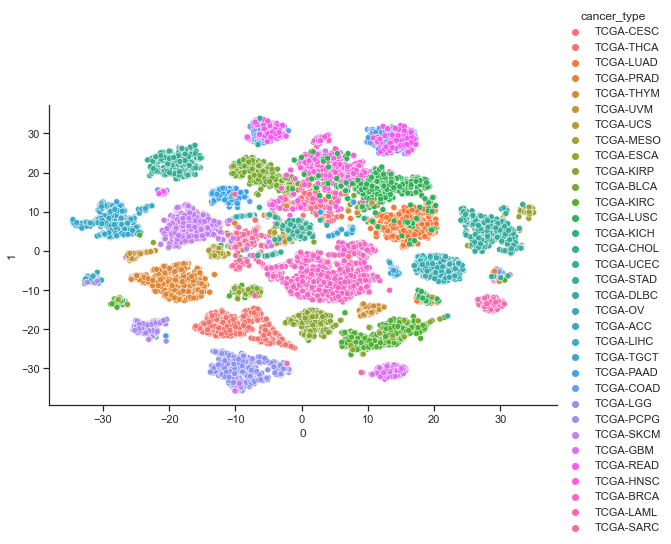

In [30]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

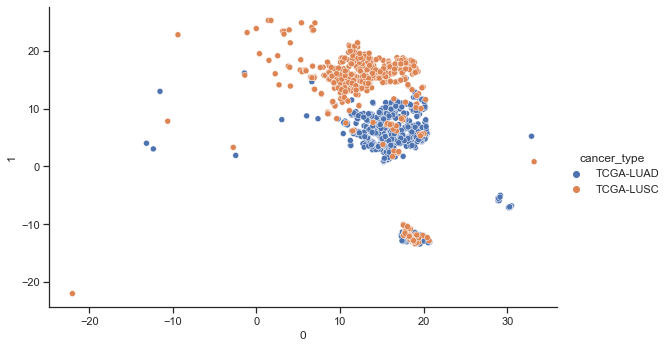

In [31]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

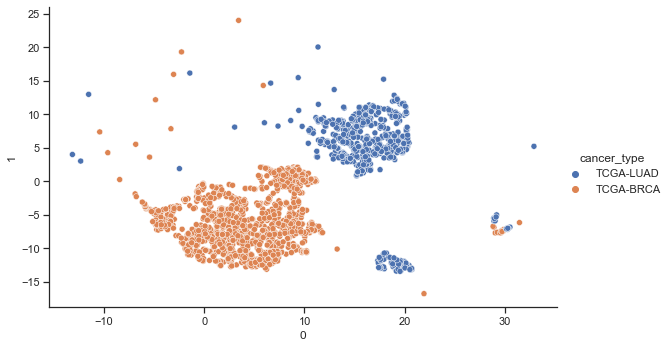

In [32]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()

### 7. Visualization and Clustering using UMAP

Install umap: !pip3 install umap-learn

In [ ]:
# import umap.umap_ as umap
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(encoded_train)
# umap_components = pd.DataFrame(embedding)
# umap_components.head()

In [ ]:
# grouped_umap = pd.merge(umap_components , patient_metadata['cases.0.project.project_id'] , left_index=True, right_index=True)
# grouped_umap.rename(columns={'cases.0.project.project_id': "cancer_type"},inplace=True)
# grouped_umap.head()

In [ ]:
# seaborn.set(style='ticks')
# cancer_types = grouped_umap['cancer_type'].tolist()
# cancer_types = list(set(cancer_types))

# seaborn.relplot(data=grouped_umap, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
# plt.show()